In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')


In [115]:
USA_All_Bee_losses_df= pd.read_csv('USA_Total_Final.csv')
#USA_All_Bee_loses= USA_All_Bee_loses_df.drop(USA_All_Bee_loses_df.columns[[0]], axis=1) 
USA_All_Bee_losses_df


,Season,USA Total
0,1/1/15,497940
1,4/1/15,350920
2,7/1/15,456200
3,10/1/15,410750
4,1/1/16,415200
5,4/1/16,328750
6,7/1/16,395370
7,10/1/16,501770
8,1/1/17,397110
9,4/1/17,285430


In [116]:
USA_All_Bee_losses_df.columns


Index(['Season', 'USA Total'], dtype='object')

In [117]:
X = USA_All_Bee_losses_df[["Season"]]
y = USA_All_Bee_losses_df["USA Total"].values.reshape(-1, 1)
print(X.shape, y.shape)

(14, 1) (14, 1)


In [118]:
# Use Pandas get_dummies to convert categorical data
X = pd.get_dummies(USA_All_Bee_losses_df[["Season"]])
y = USA_All_Bee_losses_df["USA Total"].values.reshape(-1, 1)
X.head()


,Season_1/1/15,Season_1/1/16,Season_1/1/17,Season_1/1/18,Season_10/1/15,Season_10/1/16,Season_10/1/17,Season_4/1/15,Season_4/1/16,Season_4/1/17,Season_4/1/18,Season_7/1/15,Season_7/1/16,Season_7/1/17
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
USA_All_Bee_losses.columns

Index(['USA Total', 'Season_1/1/15', 'Season_1/1/16', 'Season_1/1/17',
       'Season_1/1/18', 'Season_10/1/15', 'Season_10/1/16', 'Season_10/1/17',
       'Season_4/1/15', 'Season_4/1/16', 'Season_4/1/17', 'Season_4/1/18',
       'Season_7/1/15', 'Season_7/1/16', 'Season_7/1/17'],
      dtype='object')

In [120]:
# Assign X (data) and y (target)


X = USA_All_Bee_losses[['Season_1/1/15','Season_10/1/15','Season_4/1/15','Season_7/1/15']]
y = USA_All_Bee_losses["USA Total"].values.reshape(-1, 1)
print(X.shape, y.shape)


(14, 4) (14, 1)


In [121]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [122]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [123]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [124]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

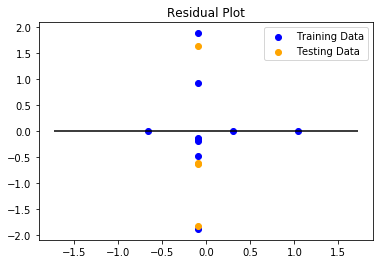

In [125]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()




KeyError: 'size'

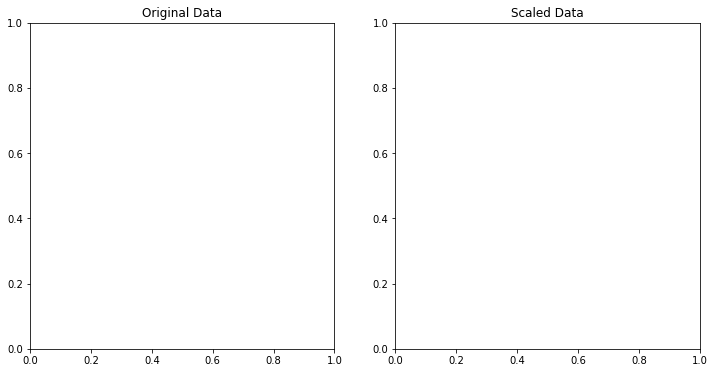

In [127]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [126]:
#USA_Total_df = USA_All_Bee_loses_df.stack()#.reset_index()
#USA_Total_df .columns=['','Season','USA Total']
#USA_Total_dropcolumn= USA_Total_df.drop(USA_Total_df.columns[[0]], axis=1) 
#USA_Total_droprow=USA_Total_dropcolumn.drop(USA_Total_dropcolumn.index[0,5,])
#USA_Total_df          

In [109]:
#USA_Total_droprow_1=USA_Total_dropcolumn.drop(USA_Total_dropcolumn.index[0])
#USA_Total_droprow_1

In [110]:
#USA_Total_droprow_2 = USA_Total_droprow_1.drop(USA_Total_droprow_1.index[[[4,9,14]]]).reset_index()
#USA_Total_droprow_2

In [111]:
#USA_Total_droprow_3 = USA_Total_droprow_2.drop(USA_Total_droprow_2.index[14])#.reset_index()
#USA_Total_droprow_3

In [112]:
#SN_USA_Total= USA_Total_droprow_3.drop(USA_Total_droprow_3.columns[[0]], axis=1) 
#SN_USA_Total

ValueError: x and y must be the same size

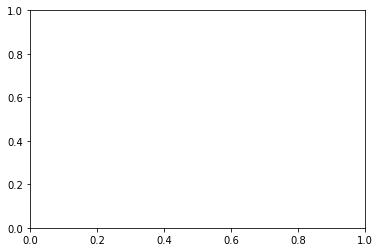

In [113]:
# Plot the data to see if a linear trend exists


plt.scatter(X, y)
plt.xlabel("Seasons")
plt.ylabel("Nations Total")


In [91]:

#USA_All_Bee_loses[['USA Total']].plot(kind='line')

#plt.show()

In [92]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [93]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [94]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate some data
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

ValueError: shapes (4,4) and (1,) not aligned: 4 (dim 1) != 1 (dim 0)

In [97]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

ValueError: shapes (4,4) and (1,) not aligned: 4 (dim 1) != 1 (dim 0)